In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [2]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

## Reading the data
### We will store the path of train , test and validation data in seperate list. Here, all the data store in "clean" directory will have the same label which is : clean, and all the data store in "messy" directory will have the same label: messy. 
### clean: 0, messy: 1

In [3]:
# storing train images path and label
train_path = []
label_train = []

path_train = "C:/Users/Oishi/Downloads/images/images/train"

for filename in os.listdir(path_train+"/clean/"):
    train_path.append(path_train + "/clean/" + filename)
    label_train.append(0)

for filename in os.listdir(path_train+"/messy"):
    train_path.append(path_train + "/messy/" + filename)
    label_train.append(1)

print("Number of train images: ", len(train_path))

Number of train images:  192


In [4]:
# storing validation images path and label
val_path = []
label_val = []

path_val = "C:/Users/Oishi/Downloads/images/images/val"

for filename in os.listdir(path_val+"/clean"):
    val_path.append(path_val + "/clean/" + filename)
    label_val.append(0)
    
for filename in os.listdir(path_val+"/messy"):
    val_path.append(path_val + "/messy/" + filename)
    label_val.append(1)
    
print("Number of validation images: ", len(val_path))

Number of validation images:  20


In [5]:
# storing test images path, it doesn't have any label
test_path = []

for filename in os.listdir("C:/Users/Oishi/Downloads/images/test/"):
    test_path.append("C:/Users/Oishi/Downloads/images/images/test/" + filename)

print("Number of validation images: ", len(test_path))

Number of validation images:  10


## Verifying the images

### Displaying the one image from each train test and validation data to verify if the images are loaded properly or not.

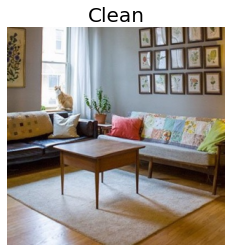

In [6]:
#checking training path
image = cv2.imread(train_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title("Clean", fontsize = 20)
plt.axis('off')
plt.show()

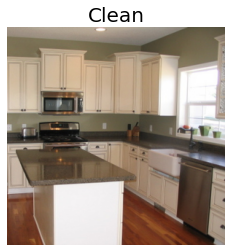

In [7]:
# checking validation path
image = cv2.imread(val_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# the first image bleongs to clean directory under validation
plt.imshow(image)
plt.title("Clean", fontsize = 20)
plt.axis('off')
plt.show()

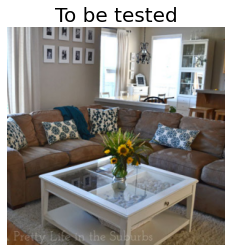

In [8]:
# checking test path
image = cv2.imread(test_path[0]) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# we dont know which image belongs to which category
plt.imshow(image)
plt.title("To be tested", fontsize = 20)
plt.axis('off')
plt.show()

## Creating train, test and validation set
### We will now create training, testing and validation data set from the retrieved path. We will resize the images so that every image has same shape. Also, the images must be convereted to numpy array before feeding them inside keras model.

In [9]:
X_train = []
X_test = []
X_val = []

# reading images for train data
for path in train_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (100,100))    
    X_train.append(image)
    
# reading images for test data
for path in test_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (100,100))    
    X_test.append(image)

# reading images for validation data
for path in val_path:
    
    image = cv2.imread(path)
    image =  cv2.resize(image, (100,100))    
    X_val.append(image)


X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)

In [10]:
#The shape (192, 100, 100, 3) means 192 train images, each with size 100 * 100 and 3 channels - BGR. 
#The array shows the pixel values stored from the image. Each pixel value is in the range 0-255 . 
#Let's divide each pixel value with 255 to get a range from 0-1.

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)

Shape of X_train:  (192, 100, 100, 3)
Shape of X_test:  (10, 100, 100, 3)
Shape of X_val:  (20, 100, 100, 3)


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)

Shape of X_train:  (192, 100, 100, 3)
Shape of X_test:  (10, 100, 100, 3)
Shape of X_val:  (20, 100, 100, 3)


In [13]:
# creating numpy array from the labels list
from tensorflow import keras
from keras import utils as np_utils
y_train = keras.utils.to_categorical(label_train, 2)
y_val = keras.utils.to_categorical(label_val, 2)

In [14]:
# displaying the shape
print("Shape of y_train: ", y_train.shape)
print("Shape of y_val: ", y_val.shape)

Shape of y_train:  (192, 2)
Shape of y_val:  (20, 2)


In [15]:
print('% of Messy in the training data: ', 100*np.sum(y_train == 0)/len(y_train[0]))
print('% of Clean in the training data: ', 100*np.sum(y_train == 1)/len(y_train[0]))

% of Messy in the training data:  9600.0
% of Clean in the training data:  9600.0


In [16]:
model = Sequential()

# input shape for first layer is 100,100,3 -> 100 * 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))

# adding 32 nodes in the second layer
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting
model.add(Dropout(0.25))

# adding more layers similarly
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5))

# activation function is sigmoid for the binary data
model.add(Dense(2, activation="sigmoid"))

# compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [17]:
# training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=30,
    epochs=150,
    validation_data=(X_val , y_val),
    shuffle=True
)

Epoch 1/150
7/7 [==============================] - 3s 427ms/step - loss: 0.9147 - accuracy: 0.4635 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/150
7/7 [==============================] - 3s 393ms/step - loss: 0.6917 - accuracy: 0.5312 - val_loss: 0.6844 - val_accuracy: 0.7500
Epoch 3/150
7/7 [==============================] - 3s 477ms/step - loss: 0.6668 - accuracy: 0.6510 - val_loss: 0.6557 - val_accuracy: 0.6500
Epoch 4/150
7/7 [==============================] - 3s 415ms/step - loss: 0.6433 - accuracy: 0.6302 - val_loss: 0.5983 - val_accuracy: 0.6500
Epoch 5/150
7/7 [==============================] - 3s 426ms/step - loss: 0.5864 - accuracy: 0.6771 - val_loss: 0.5480 - val_accuracy: 0.8000
Epoch 6/150
7/7 [==============================] - 3s 404ms/step - loss: 0.5262 - accuracy: 0.7708 - val_loss: 0.5899 - val_accuracy: 0.6500
Epoch 7/150
7/7 [==============================] - 3s 392ms/step - loss: 0.5130 - accuracy: 0.7448 - val_loss: 0.5169 - val_accuracy: 0.6000
Epoch 8/150
7

## Results

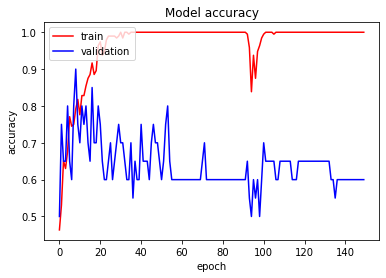

In [18]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

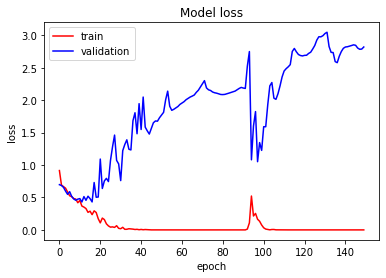

In [19]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
pred = model.predict(X_test)
pred

array([[9.9996090e-01, 1.8424140e-05],
       [1.0000000e+00, 6.7869692e-08],
       [9.8388060e-05, 9.9996150e-01],
       [1.4565613e-10, 1.0000000e+00],
       [2.7045125e-13, 1.0000000e+00],
       [9.9999851e-01, 1.1073329e-06],
       [9.9999750e-01, 3.7407304e-07],
       [9.8323083e-01, 8.7579787e-03],
       [9.0035123e-01, 1.6511953e-01],
       [1.0000000e+00, 6.7323254e-09]], dtype=float32)

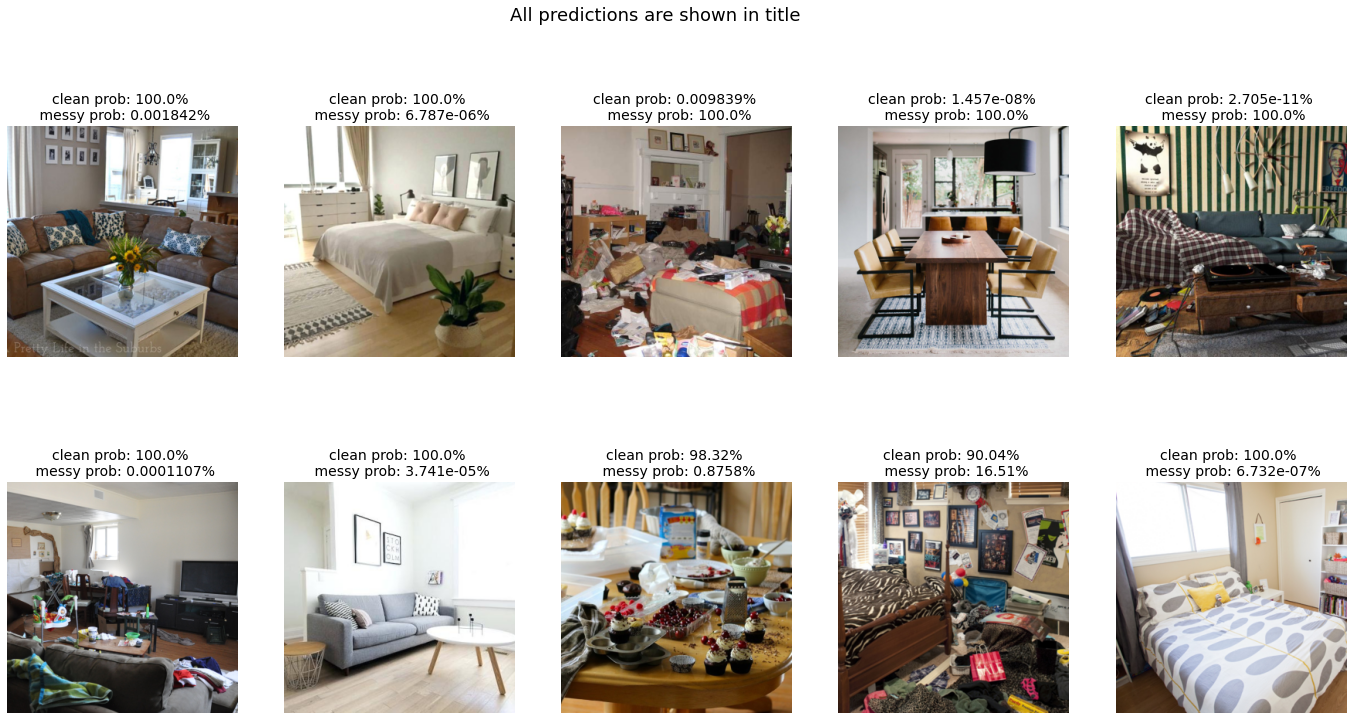

In [21]:
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
       
        txt = "clean prob: {:.4}% \n messy prob: {:.4}%".format( 100*pred[count][0], 100*pred[count][1])
        
                
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt, fontsize = 14)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()